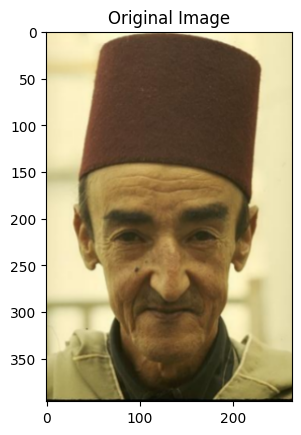

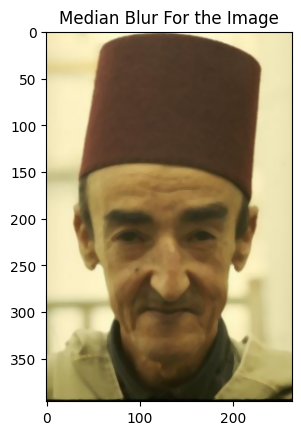

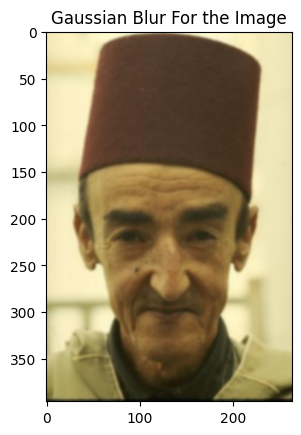

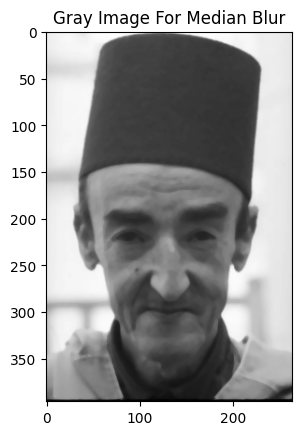

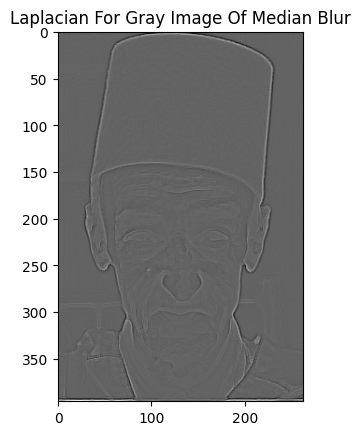

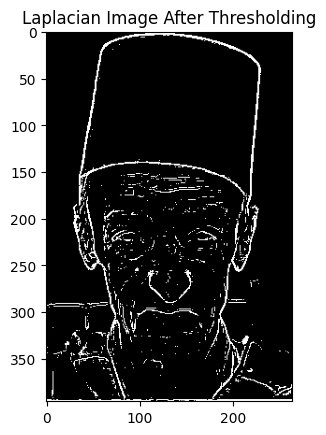

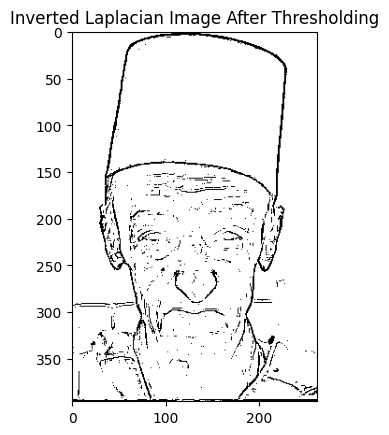

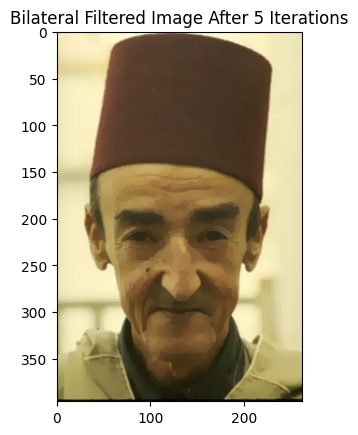

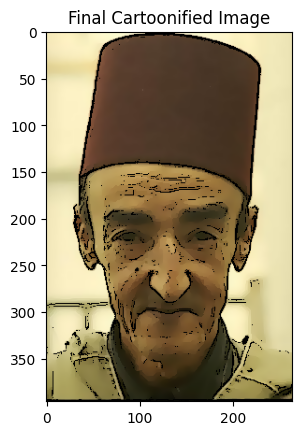

In [2]:
# dont worry hazbot comments w hakhaly el code eshta folla
import cv2
import matplotlib.pyplot as plt
import numpy as np

img = cv2.imread("images/old_man.png")

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.title("Original Image")
plt.imshow(img)
plt.show()  

median = cv2.medianBlur(img, ksize=5)
plt.title("Median Blur For the Image")
plt.imshow(median)
plt.show()

gaussian = cv2.GaussianBlur(img,ksize=(5,5),sigmaX=0,sigmaY=0)
plt.title("Gaussian Blur For the Image")
plt.imshow(gaussian)
plt.show()


gray = cv2.cvtColor(median, cv2.COLOR_RGB2GRAY)
plt.title("Gray Image For Median Blur")
plt.imshow(gray, cmap='gray')
plt.show()

laplacian = cv2.Laplacian(gray, cv2.CV_64F , ksize=3)
plt.title("Laplacian For Gray Image Of Median Blur")
plt.imshow(laplacian, cmap='gray')
plt.show()


white = np.ones(img.shape, dtype=np.uint8) * 255
white[laplacian < 20] = 0
plt.title("Laplacian Image After Thresholding")
plt.imshow(white)
plt.show()

# scale_factor = 10
# laplacian = scale_factor * laplacian
# laplacian = cv2.convertScaleAbs(laplacian) 
# ret, thresh = cv2.threshold(laplacian, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
# plt.imshow(thresh, cmap='gray')
# plt.show()


thresh = 255 - white
plt.title("Inverted Laplacian Image After Thresholding")
plt.imshow(thresh, cmap='gray')
plt.show()

size = 5 # Neighbourhood size for bilateral filter
repeat = 10  # Number of times bilateral filtering is applied
color_strength = 10 # Filter sigma in the color space
positional_strength =10 # Filter sigma in the coordinate space
for i in range(repeat):
    img = cv2.bilateralFilter(img, size, color_strength, positional_strength)
    # plt.title("Bilateral Filtered Image After ${}$ Iterations".format(i+1))
    # plt.imshow(img)
    # plt.show()

plt.title("Bilateral Filtered Image After {} Iterations".format(size))
plt.imshow(img)
plt.show()



black = np.zeros(img.shape, dtype=np.uint8)
black[thresh == 255] = img[thresh == 255] # At white pixel locations, copy image pixel values
plt.title("Final Cartoonified Image")
plt.imshow(black)
plt.show()